# Q2_DT_worksheet

In [2]:
#Run this cell
#Importing necessary libraries 
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import json
ans=[None]*5

In [3]:
#Download Dataset from https://www.kaggle.com/uciml/zoo-animal-classification

In [4]:
#Import the dataset and define the feature as well as the target datasets / columns

df = pd.read_csv('zoo.csv')
features = df.drop(['class_type'], axis=1)
target = df['class_type']

#We drop the animal names since this is not a good feature to split the data on
  
features = features.drop(['animal_name'], axis=1)

In [ ]:
#Write a function to find the entropy on a split "target_col"

def entropy(target_col):
    elements,counts = np.unique(target_col,return_counts = True)
    entropy = np.sum([(-counts[i]/np.sum(counts))*np.log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
    return entropy

In [5]:
#Find the entropy of all the features in the dataset

features_entropy = [entropy(features[i]) for i in features.columns]

#Save all the feature names in an array "feature names"

feature_names=['hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone', 
               'breathes','venomous','fins','legs','tail','domestic','catsize']

In [6]:
#Find the entropy of the feature "toothed"

ans[0] = features_entropy[7]

In [7]:
#Write a function to calculate Information Gain on a split attribute and a target column

def InfoGain(data,split_attribute_name,target_name="class"): 

    #Calculate the entropy of the total dataset  
    total_entropy = entropy(data[target_name])
    
    #Calculate the values and the corresponding counts for the split attribute   
    vals,counts= np.unique(data[split_attribute_name],return_counts=True)

    #Calculate the weighted entropy  
    Weighted_Entropy = np.sum([(counts[i]/np.sum(counts))*entropy(data.where(data[split_attribute_name]==vals[i]).dropna()[target_name]) for i in range(len(vals))])
    
    #Calculate the information gain  
    Information_Gain = total_entropy - Weighted_Entropy

    return Information_Gain

In [8]:
#Find the information gain having split attribute "hair" and the target feature name "milk"

ans[1] = InfoGain(df,'hair','milk')

In [9]:
#Find the Info gain having "milk" as the split attribute and all the other features as target features one at a time

InfoGain_milk = [InfoGain(df,'milk',i) for i in feature_names]

In [10]:
#Import Decision Tree Classifier from sklearn 

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

#Split the given data into 80 percent training data and 20 percent testing data

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

In [11]:
#Fit the given data

clf = DecisionTreeClassifier(random_state=45)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=45)

In [12]:
#Make a prediction on the test data and return the percentage of accuracy

y_pred = clf.predict(X_test)

ans[2] = clf.score(X_test, y_test) * 100 

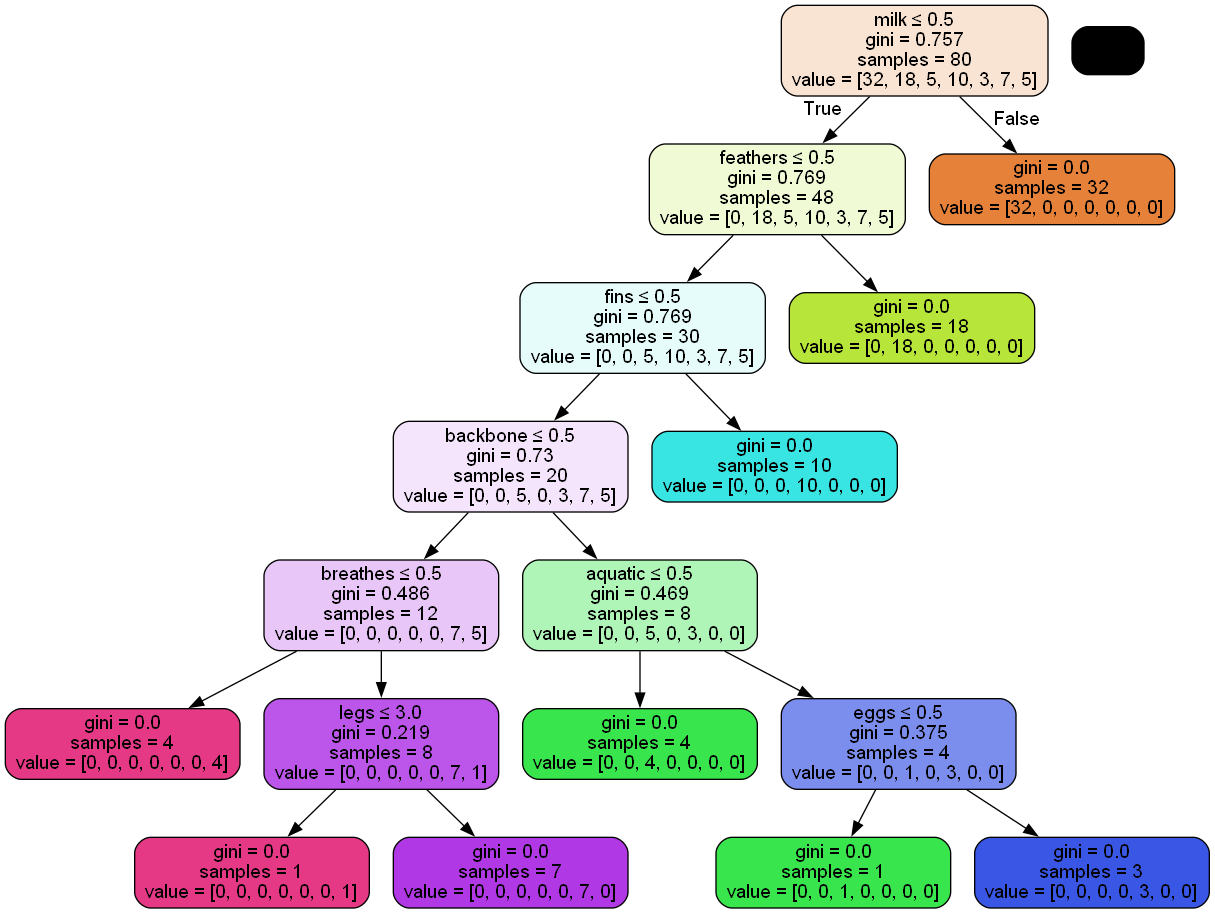

In [13]:
#Run this cell to visualize the decision tree
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(decision_tree=clf, out_file=dot_data, feature_names=feature_names,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [14]:
#Use sklearn to make a classification report and a confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       0.50      1.00      0.67         1
           7       1.00      0.80      0.89         5

    accuracy                           0.95        21
   macro avg       0.92      0.97      0.93        21
weighted avg       0.98      0.95      0.96        21

[[9 0 0 0 0 0]
 [0 2 0 0 0 0]
 [0 0 3 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 1 4]]


In [15]:
#Find the recall,f1-score for class type '3'
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score,recall_score
ans[3] = f1_score(y_test, y_pred, average=None)[2]

In [16]:
#Calculate Mean Absolute Error,Mean Squared Error and Root Mean Squared Error

from sklearn.metrics import mean_absolute_error, mean_squared_error
meanAbsoluteErro = mean_absolute_error(y_test, y_pred)
meanSquaredError = mean_squared_error(y_test, y_pred)
rootMeanSquaredError = np.sqrt(mean_squared_error(y_test, y_pred))

In [17]:
#Find the mean absolute error and root mean square error, save then in a list [mae,rmse]
ans[4] = [meanAbsoluteErro,rootMeanSquaredError]

In [18]:
ans = [item for item in ans]
with open('ans.json', 'w') as f:
    json.dump(ans, f)
# ! ~/submit